## 词嵌入
⾃然语⾔是⽤来表达⼈脑思维的复杂系统。在这个系统中，词是意义的基本单元。顾名思义，词向量是⽤于
表⽰单词意义的向量，并且还可以被认为是单词的特征向量或表⽰。将单词映射到实向量的技术称为词嵌⼊。
近年来，词嵌⼊逐渐成为⾃然语⾔处理的基础知识。

### 自监督的word2vec
它将每个词映射到⼀个固定⻓度的向量，这些向量能更好地
表达不同词之间的相似性和类⽐关系。word2vec⼯具包含两个模型，即跳元模型（skip-gram）(Mikolov et
al., 2013)和连续词袋（CBOW）(Mikolov et al., 2013)。对于在语义上有意义的表⽰，它们的训练依赖于条件
概率，条件概率可以被看作使⽤语料库中⼀些词来预测另⼀些单词。由于是不带标签的数据，因此跳元模型
和连续词袋都是⾃监督模型。

### 跳元模型（Skip-Gram）
跳元模型假设⼀个词可以⽤来在⽂本序列中⽣成其周围的单词。以⽂本序列“the”“man”“loves”“his”“son”
为例。假设中⼼词选择“loves”，并将上下⽂窗⼝设置为2，如图 图14.1.1所⽰，给定中⼼词“loves”，跳元
模型考虑⽣成上下⽂词“the”“man”“him”“son”的条件概率：  
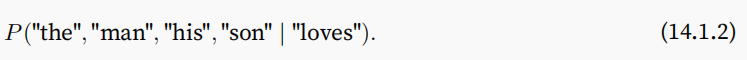

假设上下⽂词是在给定中⼼词的情况下独⽴⽣成的（即条件独⽴性）。在这种情况下，上述条件概率可以重
写为：  
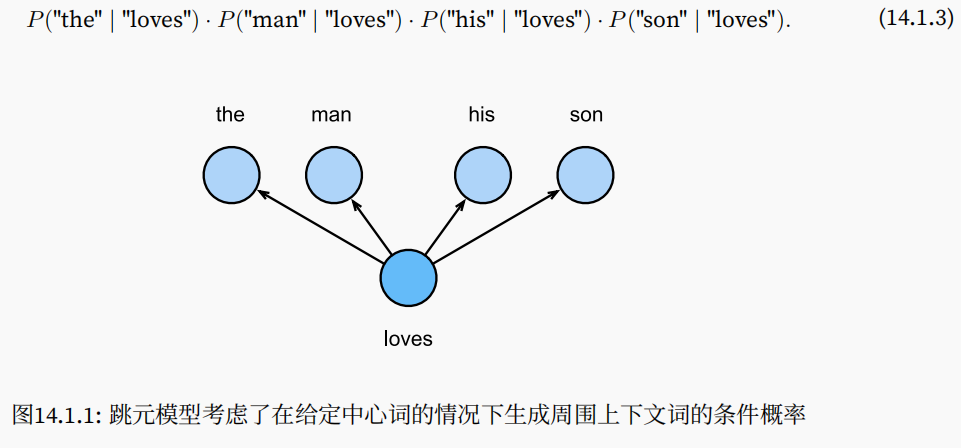

在跳元模型中，每个词都有两个d维向量表⽰，⽤于计算条件概率。更具体地说，对于词典中索引为i的任何
词，分别⽤vi ∈ Rd和ui ∈ Rd表⽰其⽤作中⼼词和上下⽂词时的两个向量。给定中⼼词wc（词典中的索引c），
⽣成任何上下⽂词wo（词典中的索引o）的条件概率可以通过对向量点积的softmax操作来建模：

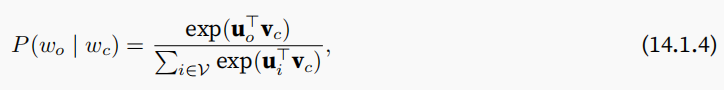

其中词表索引集V = {0, 1, . . . , |V| − 1}。给定⻓度为T的⽂本序列，其中时间步t处的词表⽰为w
(t)。假设上下⽂词是在给定任何中⼼词的情况下独⽴⽣成的。对于上下⽂窗⼝m，跳元模型的似然函数是在给定任何中⼼
词的情况下⽣成所有上下⽂词的概率：

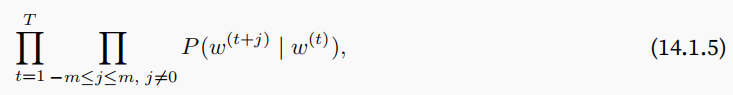

其中可以省略⼩于1或⼤于T的任何时间步。

#### 训练
跳元模型参数是词表中每个词的中⼼词向量和上下⽂词向量。在训练中，我们通过最⼤化似然函数（即极⼤
似然估计）来学习模型参数。这相当于最⼩化以下损失函数：  
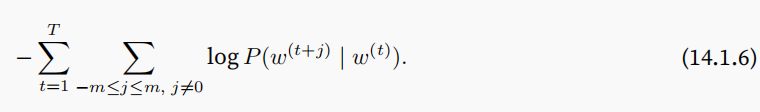

当使⽤随机梯度下降来最⼩化损失时，在每次迭代中可以随机抽样⼀个较短的⼦序列来计算该⼦序列的（随
机）梯度，以更新模型参数。为了计算该（随机）梯度，我们需要获得对数条件概率关于中⼼词向量和上下
⽂词向量的梯度。通常，根据 (14.1.4)，涉及中⼼词wc和上下⽂词wo的对数条件概率为：  
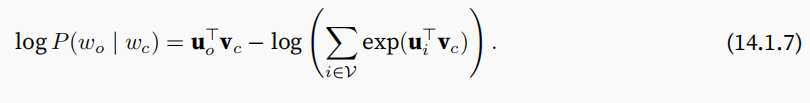

通过微分，我们可以获得其相对于中⼼词向量vc的梯度为

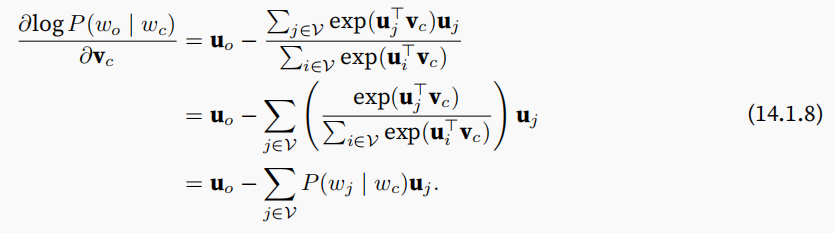

注意，(14.1.8)中的计算需要词典中以wc为中⼼词的所有词的条件概率。其他词向量的梯度可以以相同的⽅式
获得。

对词典中索引为i的词进⾏训练后，得到vi（作为中⼼词）和ui（作为上下⽂词）两个词向量。在⾃然语⾔处
理应⽤中，跳元模型的中⼼词向量通常⽤作词表⽰。

### 连续词袋（CBOW）模型
连续词袋（CBOW）模型类似于跳元模型。与跳元模型的主要区别在于，连续词袋模型假设中⼼词是基于其
在⽂本序列中的周围上下⽂词⽣成的。例如，在⽂本序列“the”“man”“loves”“his”“son”中，在“loves”
为中⼼词且上下⽂窗⼝为2的情况下，连续词袋模型考虑基于上下⽂词“the”“man”“him”“son”（如
图14.1.2所⽰）⽣成中⼼词“loves”的条件概率，即：

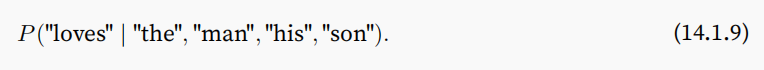

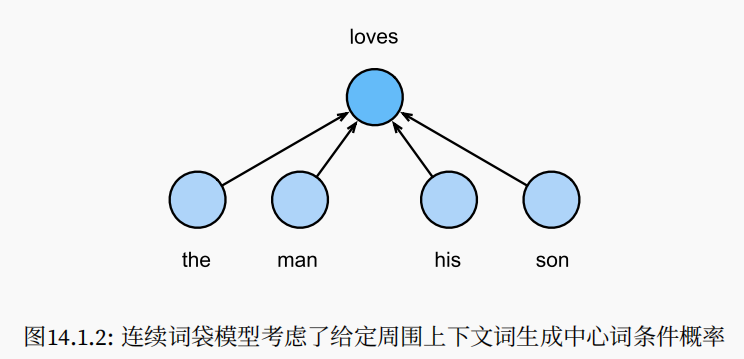

由于连续词袋模型中存在多个上下⽂词，因此在计算条件概率时对这些上下⽂词向量进⾏平均。具体地说，
对于字典中索引i的任意词，分别⽤vi ∈ Rd和ui ∈ Rd表⽰⽤作上下⽂词和中⼼词的两个向量（符号与跳元模
型中相反）。给定上下⽂词wo1, . . . , wo2m（在词表中索引是o1, . . . , o2m）⽣成任意中⼼词wc（在词表中索引
是c）的条件概率可以由以下公式建模:  
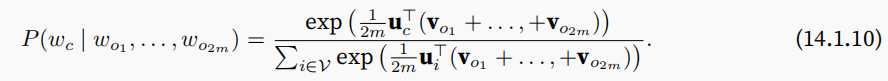

为了简洁起⻅，我们设为Wo = {wo1, . . . , wo2m}和v¯o = (vo1 + . . . , +vo2m) /(2m)。那么 (14.1.10)可以简化为：  
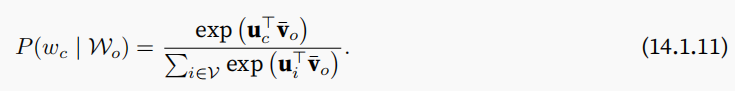

给定⻓度为T的⽂本序列，其中时间步t处的词表⽰为w
(t)。对于上下⽂窗⼝m，连续词袋模型的似然函数是
在给定其上下⽂词的情况下⽣成所有中⼼词的概率：

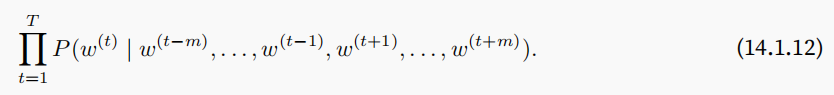

#### 训练
训练连续词袋模型与训练跳元模型⼏乎是⼀样的。连续词袋模型的最⼤似然估计等价于最⼩化以下损失函数：

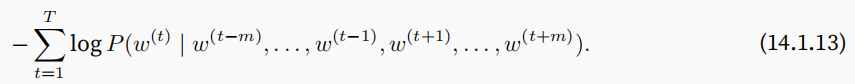

请注意，

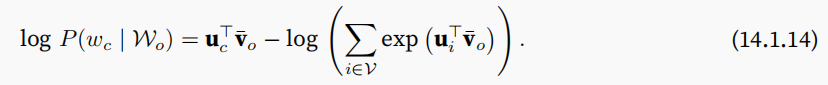

通过微分，我们可以获得其关于任意上下⽂词向量voi（i = 1, . . . , 2m）的梯度，如下：

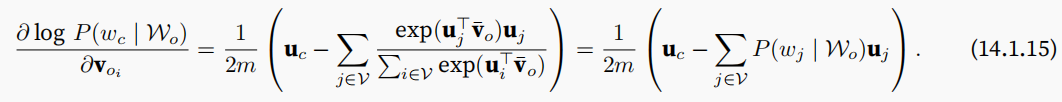

其他词向量的梯度可以以相同的⽅式获得。与跳元模型不同，连续词袋模型通常使⽤上下⽂词向量作为词表
⽰。

## 小结
* 词向量是⽤于表⽰单词意义的向量，也可以看作词的特征向量。将词映射到实向量的技术称为词嵌⼊。
* word2vec⼯具包含跳元模型和连续词袋模型。
* 跳元模型假设⼀个单词可⽤于在⽂本序列中，⽣成其周围的单词；⽽连续词袋模型假设基于上下⽂词来⽣成中⼼单词。